In [5]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image

DATA_PATH = "../../OneDrive - m.titech.ac.jp/Lab/data"

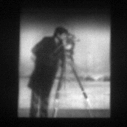

In [6]:
H_true = np.load(f"{DATA_PATH}/systemMatrix/H_matrix_true.npy")
sample_image = Image.open(f"{DATA_PATH}/sample_image64/Cameraman64.png").convert("L")
sample_image = np.asarray(sample_image).flatten() / 255

Hf = H_true @ sample_image
Hf_img = Hf.reshape(128, 128)
Hf_img = np.clip(Hf_img, 0, 1)
Hf_pil = Image.fromarray((Hf_img * 255).astype(np.uint8), mode="L")

FILENAME = f"GT.png"
fig, ax = plt.subplots(figsize=Hf_img.shape[::-1], dpi=1, tight_layout=True)
ax.imshow(Hf_pil, cmap="gray")
ax.axis("off")
fig.savefig(f"{DATA_PATH}/240724/{FILENAME}", dpi=1)
plt.show()

In [13]:
Original = cv2.imread(f"{DATA_PATH}/240724/GT.png")
Compared = cv2.imread(f"{DATA_PATH}/240724/hadamard_pr-du_p-10_lmd1-10_lmd2-1.png")

# 画素値の読み込み
pixel_value_Ori = Original.flatten().astype(float)
pixel_value_Dis = Compared.flatten().astype(float)

# 画素情報の取得
imageHeight, imageWidth, BPP = Original.shape

# 画素数
N = imageHeight * imageWidth

# 1画素あたりRGB3つの情報がある.
addr = N * BPP

# RGB画素値の差の2乗の総和
sumR = 0
sumG = 0
sumB = 0

# 差の2乗の総和を計算
for i in range(addr):
    if i % 3 == 0:
        sumB += pow((pixel_value_Ori[i] - pixel_value_Dis[i]), 2)
    elif i % 3 == 1:
        sumG += pow((pixel_value_Ori[i] - pixel_value_Dis[i]), 2)
    else:
        sumR += pow((pixel_value_Ori[i] - pixel_value_Dis[i]), 2)

# PSNRを求める
MSE = (sumR + sumG + sumB) / (3 * N)
PSNR = 10 * math.log(255 * 255 / MSE, 10)
print("PSNR", PSNR)

PSNR 19.079558461490013
